<img align="left" width="1780" height="282" src="https://geopandas.org/en/stable/_images/geopandas_logo_green.png"/>

# **GEOPANDAS INTRO**

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting.

[Oficial documentations](https://geopandas.org/en/stable/#)




## **1. INSTALL DEPENDENCIES**

### **1.1. LINUX**

The purpose of this library is to provide:
1. An extensible framework that will support robust spatial indexing methods.

2. Support for sophisticated spatial queries. Range, point location, nearest neighbor and k-nearest neighbor as well as parametric queries (defined by spatial constraints) should be easy to deploy and run.

3. Easy to use interfaces for inserting, deleting and updating information.

4. Wide variety of customization capabilities. Basic index and storage characteristics like the page size, node capacity, minimum fan-out, splitting algorithm, etc. should be easy to customize.

5. Index persistence. Internal memory and external memory structures should be supported. Clustered and non-clustered indices should be easy to be persisted.


In [ ]:
!apt install libspatialindex-dev -qq 2>/dev/null >/dev/null;

In [ ]:
!mkdir datasets

### **1.2. PYTHON**

* **geopandas:**  is a project to add support for geographic data to pandas objects.
* **pygeos:** is a C/Python library with vectorized geometry functions. The geometry operations are done in the open-source geometry library GEOS
* **shapely:** is a BSD-licensed Python package for manipulation and analysis of planar geometric objects.
* **pyproj:** a sample project that exists as an aid to the Python Packaging User Guide’s Tutorial on Packaging and Distributing Projects.
* **rtree:**  is a ctypes Python wrapper of libspatialindex that provides a number of advanced spatial indexing features for the spatially curious Python user
* **mapclassify:** implements a family of classification schemes for choropleth maps. Its focus is on the determination of the number of classes, and the assignment of observations to those classes
* **pandas:** is a Python package that provides fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive
* **matplotlib:** is a comprehensive library for creating static, animated, and interactive visualizations in Python.
* **warnings:** as a way to warn programmers about changes in language or library features in anticipation of backwards incompatible changes coming with Python 3.0
* **folium:** builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library
* **ipywidgets:** interactive HTML widgets for Jupyter notebooks and the IPython kernel.

In [ ]:
!pip install geopandas --quiet
!pip install pygeos --quiet
!pip install fiona --quiet 
!pip install shapely --quiet
!pip install pyproj --quiet
!pip install rtree --quiet
!pip install mapclassify --quiet

     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 38.1 MB/s 
     |████████████████████████████████| 16.7 MB 36.6 MB/s 
     |████████████████████████████████| 2.1 MB 4.4 MB/s 
     |████████████████████████████████| 1.0 MB 5.1 MB/s 


### **1.3. IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import warnings
import folium

from shapely.geometry import Point
from shapely.geometry import LineString
from shapely.geometry import Polygon
from ipywidgets import interact

warnings.filterwarnings("ignore")

## **2. BASIC SHAPES**

### **2.1. POINT**

A point layer overlays individual locations on a map, representing them with  shapes.

<img align="left" width="250" height="182" src="https://docs.microsoft.com/en-us/bingmaps/sdk-native/map-control-concepts/media/icons-default.png"/>


In [ ]:
point = {
    "id": 1,
    "place": "Alcaldía de Medellín",
    "headquarters": "main",
    "latitude":6.245436143575467, 
    "longitude": -75.5736873579952,
    "stars": "**"
}
point["geometry"] = Point(point.get("longitude"), point.get("latitude"))

df_point = pd.DataFrame(point, index=[0])

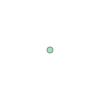

In [ ]:
point["geometry"]

In [ ]:
df_point.style.hide_index()

### **2.2. LINE**

A line layer enables you to display lines between points on your map.

<img align="left" width="250" height="182" src="https://www.tech-recipes.com/wp-content/uploads/2015/10/maps1.png"/>


In [ ]:

url_csv_lines = "https://raw.githubusercontent.com/luisvasv/data/master/maps/intro.geopandas/002.line.csv"
df_seg_lines = pd.read_csv(url_csv_lines, sep=",", index_col="id")
longitude = df_seg_lines.longitude.tolist()
latitude = df_seg_lines.latitude.tolist()
df_seg_lines

longitude  latitude
id                     
1  -75.573557  6.245480
2  -75.573300  6.245395
3  -75.572699  6.245235
4  -75.572356  6.245171
5  -75.571554  6.244871
6  -75.573729  6.238644
7  -75.575016  6.239262
8  -75.575166  6.239625
9  -75.575381  6.240116
10 -75.575917  6.239988
11 -75.576411  6.240265
12 -75.577055  6.240606
13 -75.577420  6.241524

In [ ]:
list(zip(longitude,latitude))

[(-75.5735571, 6.2454804),
 (-75.5732996, 6.245395),
 (-75.5726988, 6.2452351),
 (-75.5723555, 6.2451711),
 (-75.5715542, 6.2448707),
 (-75.5737287, 6.238644),
 (-75.5750162, 6.2392625),
 (-75.5751664, 6.2396252),
 (-75.575381, 6.2401158),
 (-75.5759174, 6.2399878),
 (-75.576411, 6.2402651),
 (-75.5770547, 6.2406064),
 (-75.5774195, 6.2415236)]

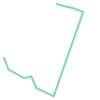

In [ ]:
data_line = {
  "id": 1,
  "description": "from alcaldia to plaza mayor"
}
data_line["geometry"] = LineString(list(zip(longitude,latitude)))
data_line["geometry"]

In [ ]:
df_line = pd.DataFrame(data_line, index=[0])
df_line

id                   description  \
0   1  from alcaldia to plaza mayor   

                                            geometry  
0  LINESTRING (-75.5735571 6.2454804, -75.5732996...

### **2.3. POLYGON**
A polygon is a line of points that creates an area

<img align="left" width="250" height="182" src="https://paulminogue.com/images/2a81457c-814a-4446-aa91-503886681571_image_2.png"/>



In [ ]:
url_csv_polygon = "https://raw.githubusercontent.com/luisvasv/data/master/maps/intro.geopandas/003.polygon.csv"
df_seg_polygon = pd.read_csv(url_csv_polygon, sep=",", index_col="id")
longitude = df_seg_polygon.longitude.tolist()
latitude = df_seg_polygon.latitude.tolist()
df_seg_polygon

longitude  latitude
id                     
1  -75.575095  6.245692
2  -75.575121  6.245143
3  -75.575154  6.243361
4  -75.574692  6.243378
5  -75.574317  6.243415
6  -75.573925  6.243340
7  -75.572922  6.243234
8  -75.572230  6.243218
9  -75.572176  6.243228
10 -75.571554  6.244871
11 -75.574805  6.245927
12 -75.575095  6.245692

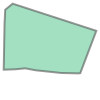

In [ ]:
data_polygon = {
  "id": 1,
  "description": "alpujarra place",
  "stars": "***"
}
data_polygon["geometry"] = Polygon(list(zip(longitude,latitude)))
data_polygon["geometry"]

In [ ]:
df_polygon = pd.DataFrame(data_polygon, index=[0])
df_polygon

id      description stars  \
0   1  alpujarra place   ***   

                                            geometry  
0  POLYGON ((-75.5750947 6.2456919, -75.5751215 6...

## **3. GEOPANDAS**

### **3.1. READ DATA**

#### **3.1.1. FROM PANDAS**

In [ ]:
geo_point = gpd.GeoDataFrame(df_point, crs="EPSG:4326")
geo_line = gpd.GeoDataFrame(df_line, crs="EPSG:4326")
geo_polygon = gpd.GeoDataFrame(df_polygon, crs="EPSG:4326")

print("original = [{} : {}] new = [{} : {}]".format("df_point  ", type(df_point), "geo_point  ", type(geo_point)))
print("original = [{} : {}] new = [{} : {}]".format("df_line.  ", type(df_line), "geo_line   ", type(geo_line)))
print("original = [{} : {}] new = [{} : {}]".format("df_polygon", type(df_polygon), "geo_polygon", type(geo_polygon)))
geo_polygon

original = [df_point   : <class 'pandas.core.frame.DataFrame'>] new = [geo_point   : <class 'geopandas.geodataframe.GeoDataFrame'>]
original = [df_line.   : <class 'pandas.core.frame.DataFrame'>] new = [geo_line    : <class 'geopandas.geodataframe.GeoDataFrame'>]
original = [df_polygon : <class 'pandas.core.frame.DataFrame'>] new = [geo_polygon : <class 'geopandas.geodataframe.GeoDataFrame'>]


id      description stars  \
0   1  alpujarra place   ***   

                                            geometry  
0  POLYGON ((-75.57509 6.24569, -75.57512 6.24514...

#### **3.1.2. FROM GEOJSON**

GeoJSON is a format for encoding a variety of geographic data structures.

```json
{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [125.6, 10.1]
  },
  "properties": {
    "name": "Dinagat Islands"
  }
}
```
GeoJSON supports the following geometry types: Point, LineString, Polygon, MultiPoint, MultiLineString, and MultiPolygon. Geometric objects with additional properties are Feature objects. Sets of features are contained by FeatureCollection objects.

In [ ]:
# from local file or url
url_zones = "https://raw.githubusercontent.com/luisvasv/data/master/maps/general/002.map.comunas.medellin.geojson"

geo_zones = gpd.read_file(url_zones)
geo_zones.head(5)

OBJECTID CODIGO      NOMBRE IDENTIFICACION LIMITEMUNICIPIOID  \
0       344     01     Popular       Comuna 1               001   
1       345     02  Santa Cruz       Comuna 2               001   
2       346     03    Manrique       Comuna 3               001   
3       347     04    Aranjuez       Comuna 4               001   
4       348     05    Castilla       Comuna 5               001   

   SUBTIPO_COMUNACORREGIMIENTO LINK_DOCUMENTO    SHAPE.AREA     SHAPE.LEN  \
0                            1           None  3.098286e+06   9604.982975   
1                            1           None  2.195872e+06   8597.709005   
2                            1           None  5.096745e+06  12078.235158   
3                            1           None  4.883730e+06   9643.087768   
4                            1           None  6.064362e+06  16098.607962   

                                            geometry  
0  POLYGON ((-75.54803 6.30436, -75.54795 6.30431...  
1  POLYGON ((-75.55703 6.31007, -75.55699 6.31003...  
2  POLYGON ((-75.54252 6.28632, -75.54252 6.28632...  
3  POLYGON ((-75.56229 6.29126, -75.56221 6.29125...  
4  POLYGON ((-75.56566 6.31261, -75.56559 6.31259...

#### **3.1.3. FROM PARQUET**
Apache Parquet is an open source, column-oriented data file format designed for efficient data storage and retrieval. It provides efficient data compression and encoding schemes with enhanced performance to handle complex data in bulk. Parquet is available in multiple languages including Java, C++, Python, etc...

In [ ]:
!curl -o datasets/001.map.colombia.veredas.parquet https://raw.githubusercontent.com/luisvasv/data/master/maps/general/001.map.colombia.veredas.parquet
!curl -o datasets/001.map.medellin.streets.parquet https://raw.githubusercontent.com/luisvasv/data/master/maps/intro.geopandas/001.map.medellin.streets.parquet

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 22.6M  100 22.6M    0     0  45.9M      0 --:--:-- --:--:-- --:--:-- 45.9M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2482k  100 2482k    0     0  6915k      0 --:--:-- --:--:-- --:--:-- 6896k


In [ ]:
geo_cities = gpd.read_parquet("datasets/001.map.colombia.veredas.parquet")
geo_streets = gpd.read_parquet("datasets/001.map.medellin.streets.parquet")

In [ ]:
geo_medellin = geo_cities[geo_cities["DPTOMPIO"] == "05001"]
geo_medellin.head(5)

DPTOMPIO DPTO_CCDGO MPIO_CCDGO MPIO_CNMBR MPIO_CCNCT  \
0    05001         05        001   MEDELLÍN      05001   

                                            geometry  
0  POLYGON ((-75.66873 6.37318, -75.66929 6.37351...

In [ ]:
geo_streets.head(5)

NOMBRE_PAIS  CODIGO_PAIS ISO_PAIS CODIGO_DEPARTAMENTO NOMBRE_DEPARTAMENTO  \
0    COLOMBIA           57      COL                  05           ANTIOQUIA   
1    COLOMBIA           57      COL                  05           ANTIOQUIA   
2    COLOMBIA           57      COL                  05           ANTIOQUIA   
3    COLOMBIA           57      COL                  05           ANTIOQUIA   
4    COLOMBIA           57      COL                  05           ANTIOQUIA   

  CODIGO_MUNICIPIO NOMBRE_MUNICIPIO  \
0            05001         MEDELLÍN   
1            05001         MEDELLÍN   
2            05001         MEDELLÍN   
3            05001         MEDELLÍN   
4            05001         MEDELLÍN   

                                            geometry  
0  LINESTRING (-75.57286 6.21152, -75.57250 6.21138)  
1  LINESTRING (-75.57052 6.21063, -75.57043 6.21059)  
2  LINESTRING (-75.57052 6.21063, -75.57056 6.210...  
3  LINESTRING (-75.56877 6.20997, -75.56871 6.20994)  
4  LINESTRING (-75.56877 6.20997, -75.56880 6.209...

### **3.2. CRS**

The Coordinate Reference System (CRS) is important because the geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space. A CRS tells Python how those coordinates relate to places on the Earth.


#### **3.2.1. GET**

In [ ]:
geo_zones.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

#### **3.2.2. SET**

In [ ]:
# your_df.crs = {'init': 'epsg:4326'}
# your_df.to_crs({'init': 'epsg:4326'})

### **3.3. PLOT LAYERS**


* **geo_point:** the specific point on the map (*)
* **geo_line:** the line showing a path (*)
* **geo_polygon:** the polygon enclosing an area (*)
* **geo_zones:** Medellin metropolitan zones (*)
* **geo_cities:** Colombia's cities
* **geo_medellin:** the polygon of Medellin (*)
* **geo_streets:** the lines showing the Medellin streets (*)


**NOTE:** (*) required.

[]

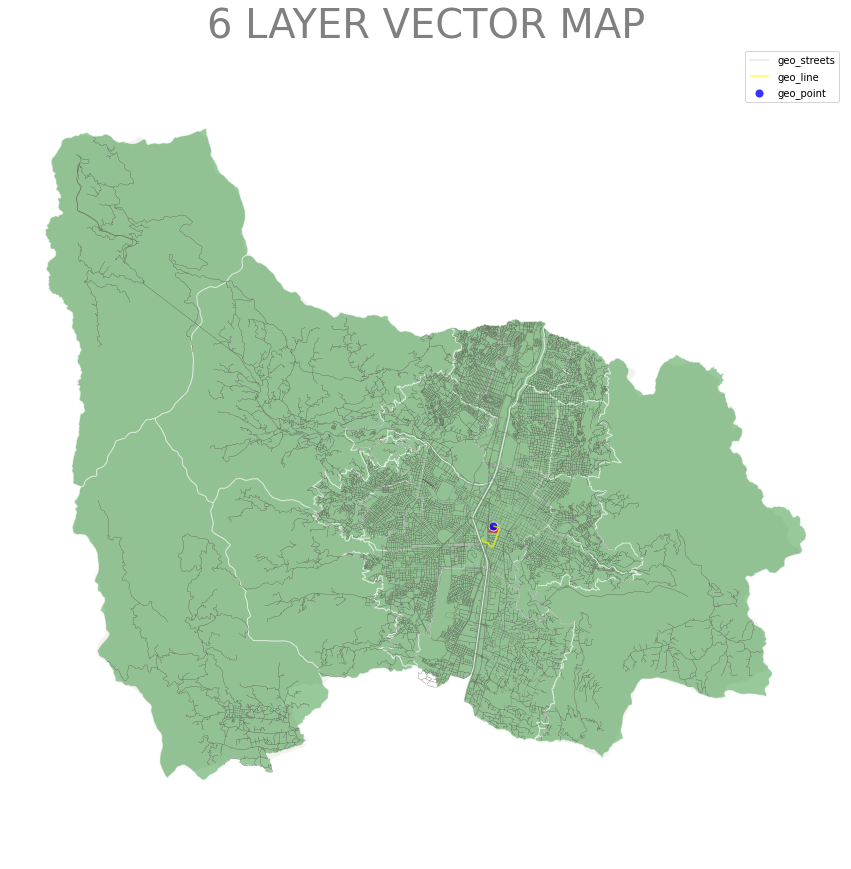

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
geo_streets.plot(ax=ax, color="#524A4A",lineWidth=0.2 ,alpha=0.8)
geo_medellin.plot(ax=ax, color="#F1ECEB", alpha=0.7)
geo_zones.plot(ax=ax, markersize=40, color="#329437", alpha=0.5, edgecolor="white", marker="o", label="sssss")
geo_polygon.plot(ax=ax, color="red", alpha=0.7)
geo_line.plot(ax=ax, color="yellow", alpha=0.7)
geo_point.plot(ax=ax, markersize=80, color="blue", alpha=0.8, edgecolor="white", marker="o")
plt.title("6 LAYER VECTOR MAP", fontsize=40, color="grey")
plt.axis("off")
plt.axis("equal")
plt.legend(["geo_streets", "geo_line","geo_point" ], loc=0, frameon=True)
plt.plot()

### **3.3. INTERMEDIATE OPERATION**

#### **3.3.1. DISTANCE**

In [ ]:
geo_streets['distance'] = geo_streets.apply(lambda row : geo_point.distance(row['geometry']), axis=1)
geo_streets

NOMBRE_PAIS  CODIGO_PAIS ISO_PAIS CODIGO_DEPARTAMENTO  \
0        COLOMBIA           57      COL                  05   
1        COLOMBIA           57      COL                  05   
2        COLOMBIA           57      COL                  05   
3        COLOMBIA           57      COL                  05   
4        COLOMBIA           57      COL                  05   
...           ...          ...      ...                 ...   
40240    COLOMBIA           57      COL                  05   
40241    COLOMBIA           57      COL                  05   
40242    COLOMBIA           57      COL                  05   
40243    COLOMBIA           57      COL                  05   
40244    COLOMBIA           57      COL                  05   

      NOMBRE_DEPARTAMENTO CODIGO_MUNICIPIO NOMBRE_MUNICIPIO  \
0               ANTIOQUIA            05001         MEDELLÍN   
1               ANTIOQUIA            05001         MEDELLÍN   
2               ANTIOQUIA            05001         MEDELLÍN   
3               ANTIOQUIA            05001         MEDELLÍN   
4               ANTIOQUIA            05001         MEDELLÍN   
...                   ...              ...              ...   
40240           ANTIOQUIA            05001         MEDELLÍN   
40241           ANTIOQUIA            05001         MEDELLÍN   
40242           ANTIOQUIA            05001         MEDELLÍN   
40243           ANTIOQUIA            05001         MEDELLÍN   
40244           ANTIOQUIA            05001         MEDELLÍN   

                                                geometry  distance  
0      LINESTRING (-75.57286 6.21152, -75.57250 6.21138)  0.033929  
1      LINESTRING (-75.57052 6.21063, -75.57043 6.21059)  0.034952  
2      LINESTRING (-75.57052 6.21063, -75.57056 6.210...  0.034952  
3      LINESTRING (-75.56877 6.20997, -75.56871 6.20994)  0.035809  
4      LINESTRING (-75.56877 6.20997, -75.56880 6.209...  0.035809  
...                                                  ...       ...  
40240  LINESTRING (-75.70103 6.34180, -75.70083 6.341...  0.157636  
40241  LINESTRING (-75.70103 6.34180, -75.70121 6.341...  0.159690  
40242  LINESTRING (-75.70072 6.34204, -75.70071 6.341...  0.159490  
40243  LINESTRING (-75.70077 6.34211, -75.70095 6.34230)  0.159676  
40244  LINESTRING (-75.70077 6.34211, -75.70072 6.34204)  0.159586  

[40245 rows x 9 columns]

In [ ]:
geo_streets_segment = geo_streets.sort_values('distance').head(1000)
geo_streets_segment.head(10)

NOMBRE_PAIS  CODIGO_PAIS ISO_PAIS CODIGO_DEPARTAMENTO  \
20061    COLOMBIA           57      COL                  05   
39818    COLOMBIA           57      COL                  05   
20062    COLOMBIA           57      COL                  05   
4281     COLOMBIA           57      COL                  05   
1981     COLOMBIA           57      COL                  05   
1870     COLOMBIA           57      COL                  05   
1869     COLOMBIA           57      COL                  05   
25751    COLOMBIA           57      COL                  05   
35208    COLOMBIA           57      COL                  05   
224      COLOMBIA           57      COL                  05   

      NOMBRE_DEPARTAMENTO CODIGO_MUNICIPIO NOMBRE_MUNICIPIO  \
20061           ANTIOQUIA            05001         MEDELLÍN   
39818           ANTIOQUIA            05001         MEDELLÍN   
20062           ANTIOQUIA            05001         MEDELLÍN   
4281            ANTIOQUIA            05001         MEDELLÍN   
1981            ANTIOQUIA            05001         MEDELLÍN   
1870            ANTIOQUIA            05001         MEDELLÍN   
1869            ANTIOQUIA            05001         MEDELLÍN   
25751           ANTIOQUIA            05001         MEDELLÍN   
35208           ANTIOQUIA            05001         MEDELLÍN   
224             ANTIOQUIA            05001         MEDELLÍN   

                                                geometry  distance  
20061  LINESTRING (-75.57375 6.24561, -75.57364 6.245...  0.000143  
39818  LINESTRING (-75.57494 6.24587, -75.57475 6.245...  0.000183  
20062  LINESTRING (-75.57375 6.24561, -75.57398 6.245...  0.000183  
4281   LINESTRING (-75.57444 6.24341, -75.57434 6.245...  0.000183  
1981   LINESTRING (-75.57775 6.24699, -75.57715 6.246...  0.000263  
1870   LINESTRING (-75.57178 6.24520, -75.57256 6.245...  0.000366  
1869   LINESTRING (-75.57178 6.24520, -75.57250 6.245...  0.000472  
25751  LINESTRING (-75.57359 6.24590, -75.57419 6.246...  0.000475  
35208  LINESTRING (-75.57344 6.24626, -75.57356 6.245...  0.000475  
224    LINESTRING (-75.57432 6.24664, -75.57344 6.24626)  0.000864

#### **3.3.2. NEAREST**

In [ ]:
geo_sjoin_nearest = gpd.sjoin_nearest(geo_point, geo_streets_segment).merge(geo_streets_segment, left_on="index_right", right_index=True) 
geo_nearest = gpd.GeoDataFrame(geo_sjoin_nearest, crs=geo_streets_segment.crs)
geo_nearest

id                 place headquarters  latitude  longitude stars  \
0   1  Alcaldía de Medellín         main  6.245436 -75.573687    **   

                  geometry_x  index_right NOMBRE_PAIS_x  CODIGO_PAIS_x  ...  \
0  POINT (-75.57369 6.24544)        20061      COLOMBIA             57  ...   

  distance_x NOMBRE_PAIS_y CODIGO_PAIS_y ISO_PAIS_y CODIGO_DEPARTAMENTO_y  \
0   0.000143      COLOMBIA            57        COL                    05   

   NOMBRE_DEPARTAMENTO_y CODIGO_MUNICIPIO_y  NOMBRE_MUNICIPIO_y  \
0              ANTIOQUIA              05001            MEDELLÍN   

                                          geometry_y distance_y  
0  LINESTRING (-75.57375 6.24561, -75.57364 6.245...   0.000143  

[1 rows x 25 columns]

#### **3.3.3. PLOT LAYER**



[]

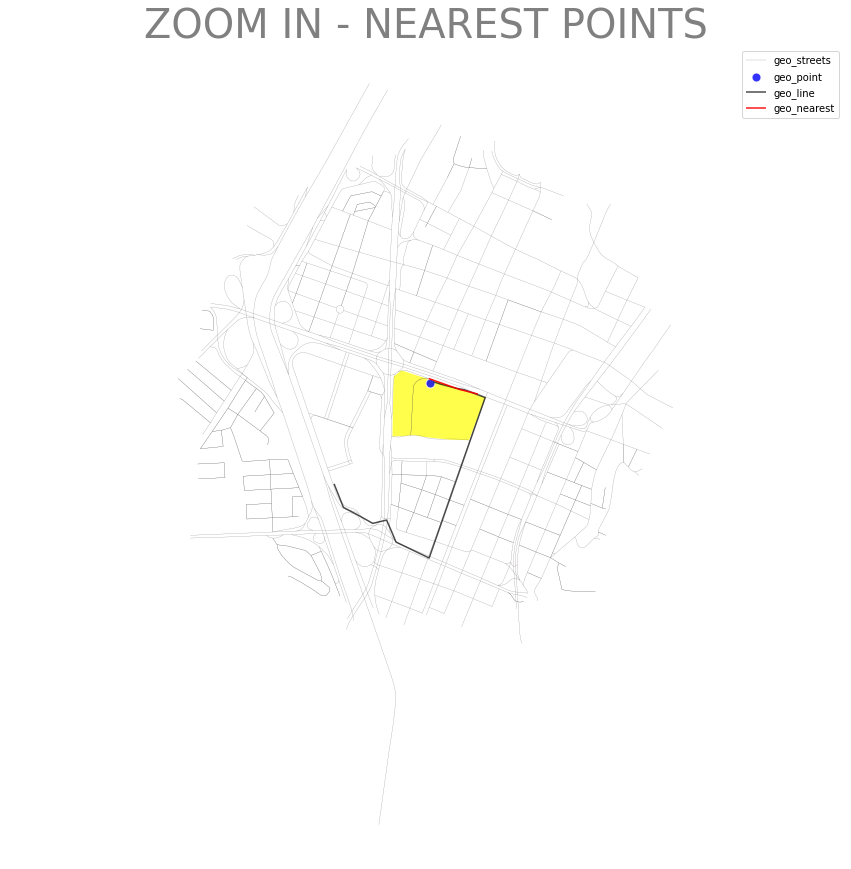

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))
geo_streets_segment.plot(ax=ax, color="#524A4A",lineWidth=0.2 ,alpha=0.8)
geo_polygon.plot(ax=ax, color="yellow", alpha=0.7)
geo_point.plot(ax=ax, markersize=80, color="blue", alpha=0.8, edgecolor="white", marker="o")
geo_line.plot(ax=ax, markersize=60,color="black", alpha=0.7,  marker="+")
geo_nearest.geometry_y.plot(ax=ax, markersize=100,color="red", alpha=0.9,  marker="*")

plt.title("ZOOM IN - NEAREST POINTS", fontsize=40, fontname="prueba de v5r que es", color="grey")
plt.axis("off")
plt.axis("equal")
plt.legend(["geo_streets", "geo_point", "geo_line", "geo_nearest"], loc=0, frameon=True)
plt.plot()

### **4. EXTRAS (FOLIO)**

<img align="left" width="369" height="142" src="https://cdn-images-1.medium.com/max/1000/1*-7Ro7fO__wwWz0iL9tucHQ.png"/>


folium makes it easy to visualize data that’s been manipulated in Python on an interactive leaflet map. It enables both the binding of data to a map for choropleth visualizations as well as passing rich `vector/raster/HTML` visualizations as markers on the map.

The library has a number of built-in tilesets from `OpenStreetMap`, `Mapbox`, and Stamen, and supports custom tilesets with `Mapbox or Cloudmade API keys`. folium supports both Image, Video, `GeoJSON` and `TopoJSON` overlays.

In [ ]:
def add_folio_layers(df, column_name, folio_maps, map_type="multi-point", geometry_column="geometry", color="orange"):
  if map_type == "multi-point":
    for _, row in df.iterrows():
        sim_geo = gpd.GeoSeries(row[geometry_column]).simplify(tolerance=0.001)
        geo_j = sim_geo.to_json()
        geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {'color': color})
        folium.Popup(row[column_name]).add_to(geo_j)
        geo_j.add_to(folio_maps)
  elif map_type == "single-point":
    for _, row in df.iterrows():
      lat = row[geometry_column].y
      lon = row[geometry_column].x
      folium.Marker(location=[lat, lon],popup='place: {} <br> stars: {}'.format(row['place'], row['stars'])).add_to(folio_maps)



def show_map(style):
  if style != "":
    title_html = '''<h3 align="center" style="font-size:16px"><b>MAP STYLE --> : {}</b></h3>'''.format(style)
    folio_maps = folium.Map(location=[6.2476376, -75.5658153], tiles=style, zoom_start=15, width="%75",height="%75")
    add_folio_layers(df=geo_polygon, column_name="description", folio_maps=folio_maps, color="yellow")
    add_folio_layers(df=geo_line, column_name="description", folio_maps=folio_maps,color="green")
    add_folio_layers(df=geo_nearest, column_name="place", folio_maps=folio_maps, geometry_column="geometry_y", color="red")
    add_folio_layers(df=geo_point, column_name="N/A", folio_maps=folio_maps,map_type="single-point")
    folio_maps.get_root().html.add_child(folium.Element(title_html))
    return folio_maps

map = interact(show_map, style=[
  "",
  "CartoDB positron",
  "OpenStreetMap",
  "Stamen Toner",
  "Stamen Terrain",
  ]
)
map

interactive(children=(Dropdown(description='style', options=('', 'CartoDB positron', 'OpenStreetMap', 'Stamen …

<function __main__.show_map>

### **5. VALORATION**


<img align="left" width="120" height="120" src="https://avatars.githubusercontent.com/u/9687629?v=4"/>



# **THANKS**!!